In [19]:
import torch

#真の係数
w_true = torch.Tensor([1, 2, 3])

#Xのデータの準備．切片を回帰係数に含めるため，
#Xの最初の次元に1を追加しておく
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
print(X)

#真の係数と各Xとの内積を行列とベクトルの積でまとめて計算
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
print(y)

#勾配降下で最適化するためのパラメータのTensorを
#乱数で初期化して作成
w = torch.randn(3, requires_grad=True)

#学習率
gamma = 0.1

tensor([[ 1.0000,  0.0591, -1.0963],
        [ 1.0000,  0.1739, -0.7550],
        [ 1.0000,  0.8675, -1.4046],
        [ 1.0000,  0.7310, -0.0539],
        [ 1.0000, -0.3254, -0.2894],
        [ 1.0000, -2.0630, -0.6665],
        [ 1.0000,  0.3127, -0.7356],
        [ 1.0000, -0.4272, -1.2054],
        [ 1.0000,  0.3542,  0.9230],
        [ 1.0000, -0.4201, -0.3244],
        [ 1.0000, -0.3967, -0.1058],
        [ 1.0000, -0.7417, -0.1882],
        [ 1.0000,  0.4806,  1.5307],
        [ 1.0000, -0.1721, -1.0109],
        [ 1.0000, -0.9517,  1.5880],
        [ 1.0000, -0.2916,  1.7903],
        [ 1.0000,  1.4846, -0.5393],
        [ 1.0000,  1.4299,  0.2495],
        [ 1.0000, -0.4279, -0.6436],
        [ 1.0000, -1.1389, -0.1695],
        [ 1.0000,  1.8602, -0.4556],
        [ 1.0000, -0.5140, -0.1561],
        [ 1.0000, -1.3104,  0.6599],
        [ 1.0000, -0.6956, -0.0526],
        [ 1.0000,  0.1437, -0.3219],
        [ 1.0000,  0.0201, -1.6160],
        [ 1.0000,  1.1009,  0.2396],
 

In [20]:
#損失関数のログ
losses = []

#100回イテレーションを回す
for epoc in range(100):
    #前回のbackwardメソッドで計算された勾配の値を削除
    w.grad = None

    #線形モデルでyの予測値を計算
    y_pred = torch.mv(X, w)

    #MSE lossとwによる微分を計算
    loss = torch.mean((y-y_pred)**2)
    loss.backward()

    #勾配を更新する
    #wをそのまま代入して更新すると異なるTensorになって
    #計算グラフが破壊されてしまうので，dataだけを更新する
    w.data = w.data - gamma * w.grad.data

    #収束確認のためにlossを記録しておく
    losses.append(loss.item())

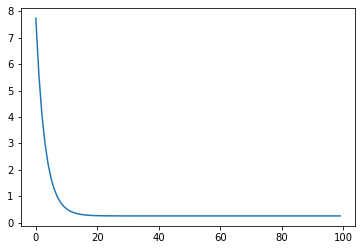

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [24]:
w

tensor([1.0513, 1.9345, 2.9696], requires_grad=True)

In [26]:
from torch import nn, optim

#Linear層を作成．今回は切片項は回帰係数に含めるので
#入力の次元は3とし，bias(切片)をFalseにする
net = nn.Linear(in_features=3, out_features=1, bias=False)

#SGDのオプティマイザーに上で定義したネットワークの
#パラメータを渡して初期化
optimizer = optim.SGD(net.parameters(), lr=0.1)

#MSE lossクラス
loss_fn = nn.MSELoss()

In [28]:
losses = []

#100回のイテレーションを回す
for epoc in range(100):
    #前回のbackwardメソッドで計算された勾配の値を削除
    optimizer.zero_grad()

    #線形モデルでyの予測値を計算
    y_pred = net(X)

    #MSE lossを計算
    #y_predは(n,1)のようなshapeを持っているので，(n,)に直す必要がある
    loss = loss_fn(y_pred.view_as(y), y)

    #lossのwによる微分を計算
    loss.backward()

    #勾配を更新する
    optimizer.step()

    #収束確認のためにlossを記録しておく
    losses.append(loss.item())

In [30]:
list(net.parameters())

[Parameter containing:
 tensor([[1.0513, 1.9345, 2.9696]], requires_grad=True)]